In [2]:
from keras.datasets.fashion_mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
labels = ["T-shirt", "Trouser", "Pullover",
          "Dress", "Coat", "Sandal", "Shirt",
          "Sneaker", "Bag", "Ankle Boot"]

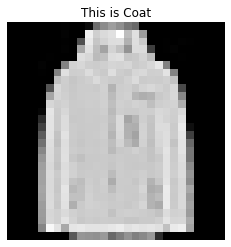

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
plt.title("This is " + labels[y_train[c]])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [6]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,79,...,0,0,1,0,2,1,0,0,0,0
3,0,0,0,0,0,0,0,2,0,167,...,62,0,1,3,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,222,...,189,0,0,0,1,0,0,0,0,0
5,0,0,0,0,3,0,0,131,210,215,...,215,230,129,0,0,0,0,0,0,0
6,0,0,0,0,1,0,131,224,206,207,...,207,208,227,131,0,0,0,0,0,0
7,0,0,0,0,0,0,193,206,198,203,...,205,204,208,194,0,0,0,0,0,0
8,0,0,0,0,0,84,216,205,200,204,...,216,210,204,215,73,0,0,0,0,0
9,0,0,0,0,0,166,213,207,201,204,...,179,201,206,216,136,0,0,0,0,0


In [7]:
# 圖片調整: (0~1) /255 -> tesorflow weights, reshape -> mlp只吃一維
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255

In [8]:

# 答案調整: One-hot Encoding: 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Before:", y_train[0])
print("After:", y_train_cat[0])

Before: 9
After: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [11]:
# batch_size: 看了幾筆資料才做一次調整(梯度下降)(更新參數)
# 資料不大: 100~200  資料很大: 10~20
# epochs: 整份資料要翻幾遍, 控制擬合程度
# val_loss平滑就該停下來
# validation_split: 驗證模型好不好, 要用沒看過的資料
# verbose: 印出多少log(1:最詳細 2:必要的 0:無)
# 10(epochs) * 54000(訓練資料) / 200(筆調整一次) = 2700(調整)
mlp.fit(x_train_reshape, y_train_cat,
        batch_size=200, epochs=3,
        validation_split=0.1, verbose=2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
 - 3s - loss: 0.5650 - accuracy: 0.8076 - val_loss: 0.4383 - val_accuracy: 0.8472
Epoch 2/3
 - 2s - loss: 0.4066 - accuracy: 0.8585 - val_loss: 0.3819 - val_accuracy: 0.8670
Epoch 3/3
 - 2s - loss: 0.3658 - accuracy: 0.8712 - val_loss: 0.3626 - val_accuracy: 0.8695


In [12]:
mlp.evaluate(x_test_reshape, y_test_cat)


10000/10000 [==============================] - 1s 62us/step


[0.3973447970151901, 0.858299970626831]

In [13]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_reshape)

c = [(str(l) + "(預測)") for l in labels]
i = [(str(l) + "(正確)") for l in labels]
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle Boot(預測)
T-shirt(正確),847,1,9,28,6,2,94,0,13,0
Trouser(正確),6,964,1,21,5,0,1,0,2,0
Pullover(正確),19,1,691,7,194,0,80,0,8,0
Dress(正確),46,12,10,851,39,0,36,0,6,0
Coat(正確),0,1,55,28,853,1,57,0,5,0
Sandal(正確),0,0,0,1,0,948,0,24,2,25
Shirt(正確),164,3,65,22,123,0,602,0,21,0
Sneaker(正確),0,0,0,0,0,33,0,881,0,86
Bag(正確),1,1,2,6,8,2,6,5,969,0
Ankle Boot(正確),0,0,0,1,0,5,1,16,0,977


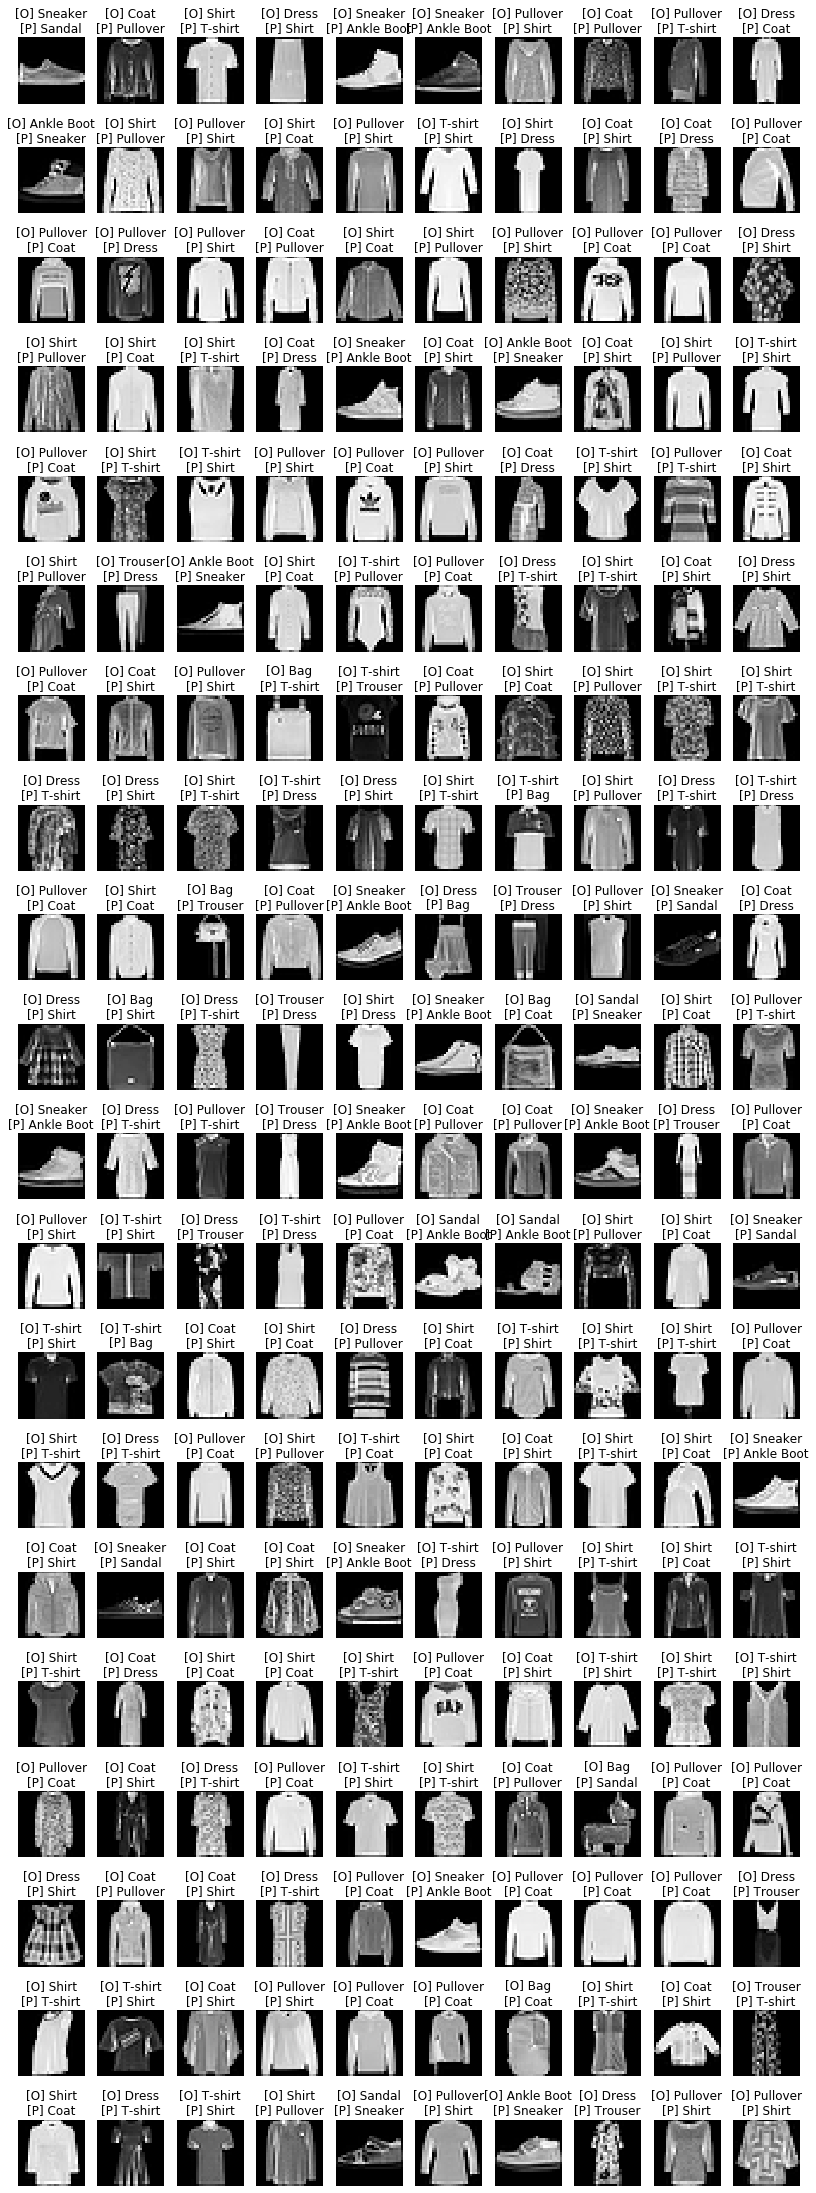

In [14]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_img = x_test[idx]
false_answer = y_test[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O] " + labels[false_answer[i]] + "\n[P] " + labels[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")